# Notebook Imports and Packages

In [167]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colormap

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Generate data

x_1 = np.linspace(start = -3, stop = 3, num = 500)

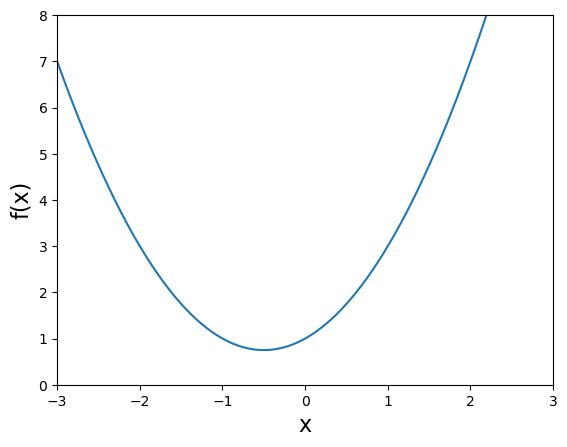

In [4]:
# Plot data
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('x', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

In [5]:
def df(x):
    return 2*x + 1

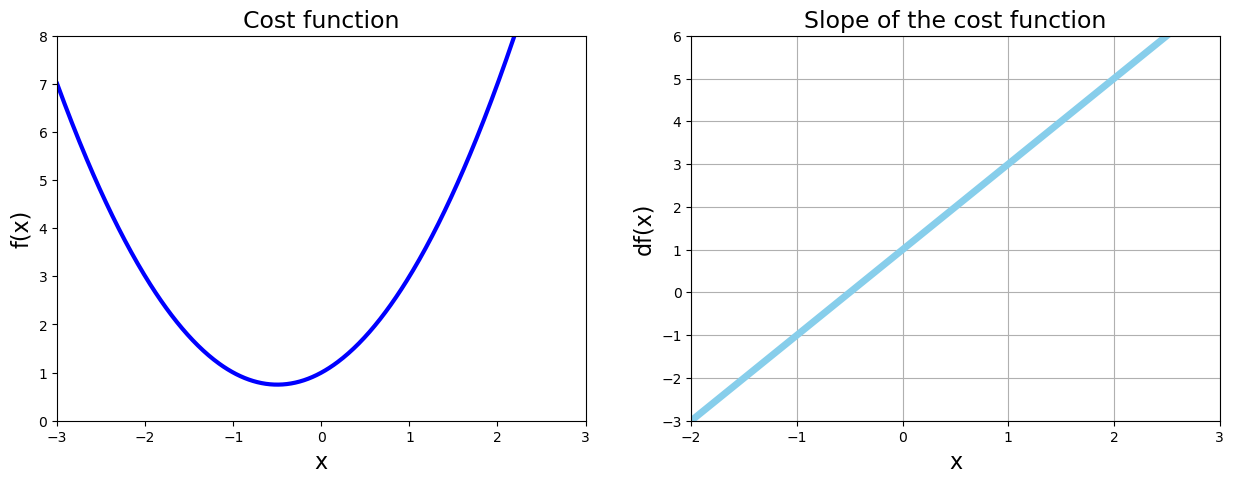

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5]) # measured in inches

# 1.Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim([-3,3])
plt.ylim([0,8])

plt.title('Cost function', fontsize = 17)
plt.xlabel('x', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.plot(x_1, f(x_1), color = 'blue', linewidth = 3)


# 2.Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim([-2,3])
plt.ylim([-3,6])

plt.grid()

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('x', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 5)


plt.show()

## Python Loops & Gradient Descent

In [7]:
# Gradient Descent

new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(10): # it learns more as num of iterations increase
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient 
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Local minimum occurs at: -0.12419036160000013
Slope or df(x) at this point is: 0.7516192767999997
f(x) value or cost at this point is: 0.8912328843143387


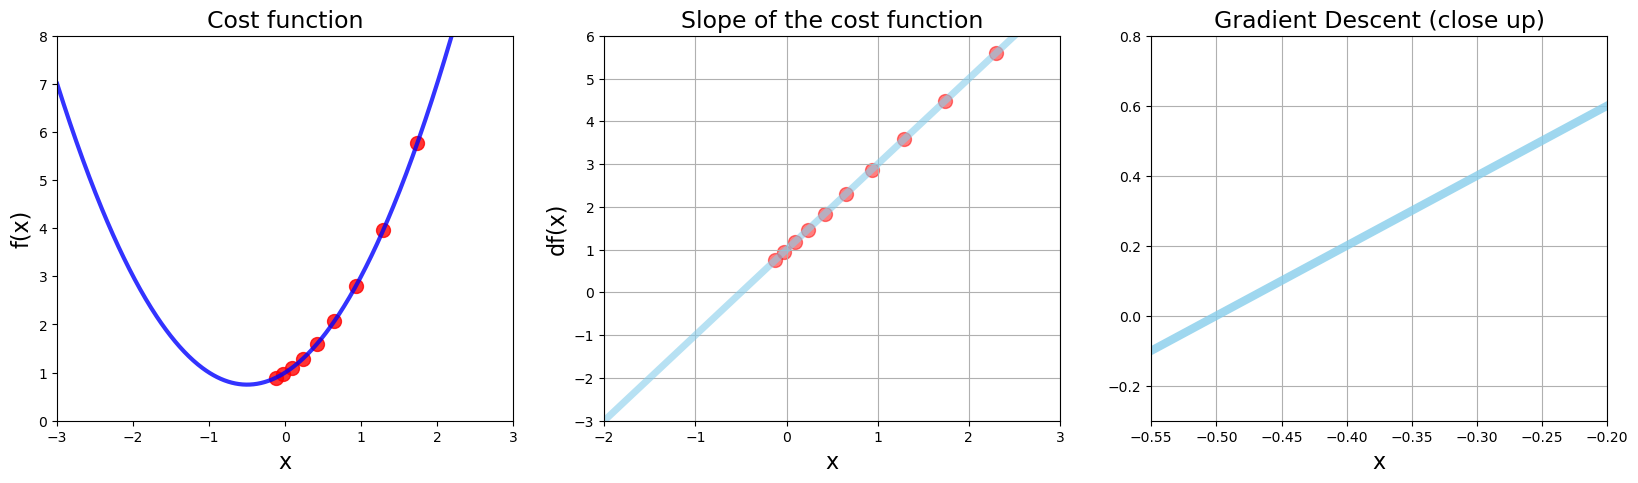

In [8]:
# Superimpose the gradient descent calculations

plt.figure(figsize=[20,5]) # measured in inches

# 1.Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim([-3,3])
plt.ylim([0,8])

plt.title('Cost function', fontsize = 17)
plt.xlabel('x', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.plot(x_1, f(x_1), color = 'blue', linewidth = 3, alpha = 0.8)

values = np.array(x_list) # function can work with an array but not with a list

plt.scatter(x_list, f(values), color = 'red', s = 100, alpha = 0.8) 

# 2.Chart: Derivative
plt.subplot(1, 3, 2)

plt.xlim(-2,3)
plt.ylim(-3,6)

plt.grid()

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('x', fontsize = 16)
plt.ylabel('df(x)', fontsize = 16)

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 5, alpha = 0.6)
plt.scatter(x_list, slope_list, color = 'red', s = 100, alpha = 0.5)

# 3.Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)

plt.grid()

plt.title('Gradient Descent (close up)', fontsize = 17)
plt.xlabel('x', fontsize = 16)

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 6, alpha = 0.8)
plt.scatter(x_list, slope_list, color = 'red', s = 300, alpha = 0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [9]:
# Generate data
x_2 = np.linspace(-2, 2, 1000)

In [10]:
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

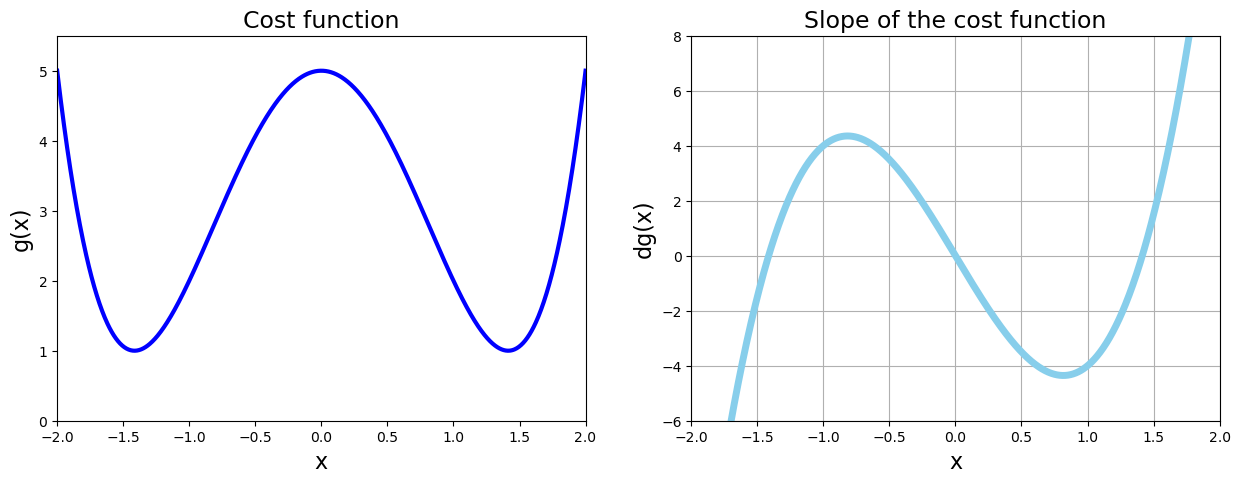

In [11]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5]) # measured in inches

# 1.Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2,2)
plt.ylim(0,5.5)

plt.title('Cost function', fontsize = 17)
plt.xlabel('x', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)

plt.plot(x_2, g(x_2), color = 'blue', linewidth = 3)


# 2.Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.grid()

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('x', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)

plt.plot(x_2, dg(x_2), color = 'skyblue', linewidth = 5)


plt.show()

## Gradient Descent as a Python Function

In [12]:
def gradient_descent(derivative_func, initial_guess, multiplier = 0.02, precision = 0.001,
                    max_iter = 300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter): # it learns more as num of iterations increase
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient 

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list # packing tuple

In [13]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001) # unpacking tuple

print('Local min:', local_min)
print('Number of steps:', len(list_x))

Local min: 1.4122375085019094
Number of steps: 23


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = -0.05, 
                                                 multiplier = 0.02, precision = 0.001)

print('Local min:', local_min)
print('Number of steps:', len(list_x))

Local min: -1.4123345111885823
Number of steps: 39


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = -0.1)

print('Local min:', local_min)
print('Number of steps:', len(list_x))

Local min: -1.4120887490901561
Number of steps: 34


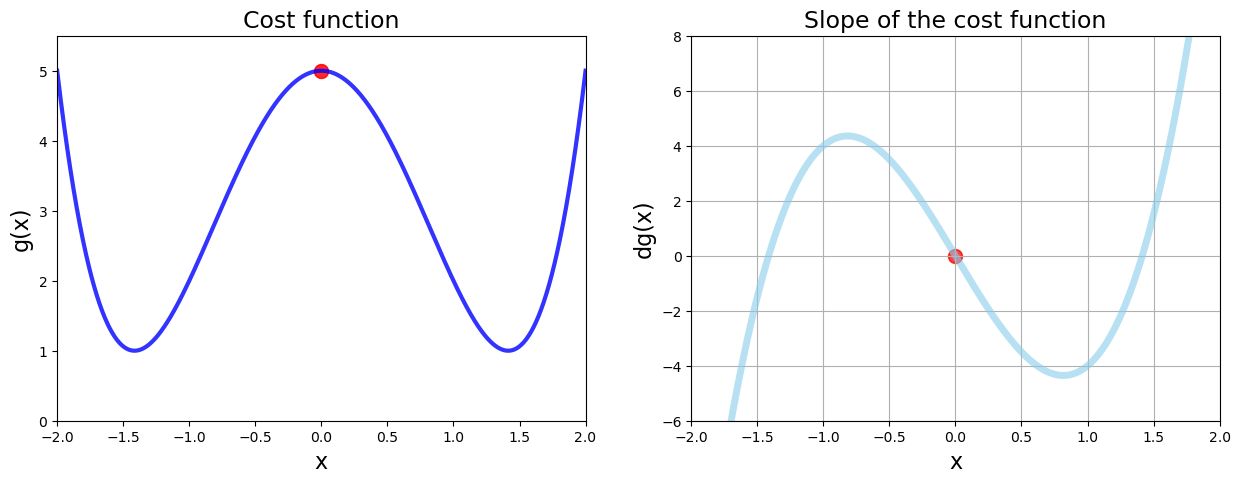

In [16]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5]) # measured in inches

# 1.Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2,2)
plt.ylim(0,5.5)

plt.title('Cost function', fontsize = 17)
plt.xlabel('x', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)

plt.plot(x_2, g(x_2), color = 'blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), color ='red', s=100, alpha=0.6) # function does not take list


# 2.Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.grid()

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('x', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)

plt.plot(x_2, dg(x_2), color = 'skyblue', linewidth = 5, alpha = 0.6)
plt.scatter(list_x, deriv_list, color = 'red', s = 100, alpha = 0.5)


plt.show()

# NOTE: Initial guess affects where you end up --> sensitive
# NOTE: Starting with 0 ends up in 0 (no descent)

# Example 3 - Divergence, Overflow, and Python Tuples

## $$h(x) = x^5 - 2x^4 + 2 $$

In [17]:
# Generate data
x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

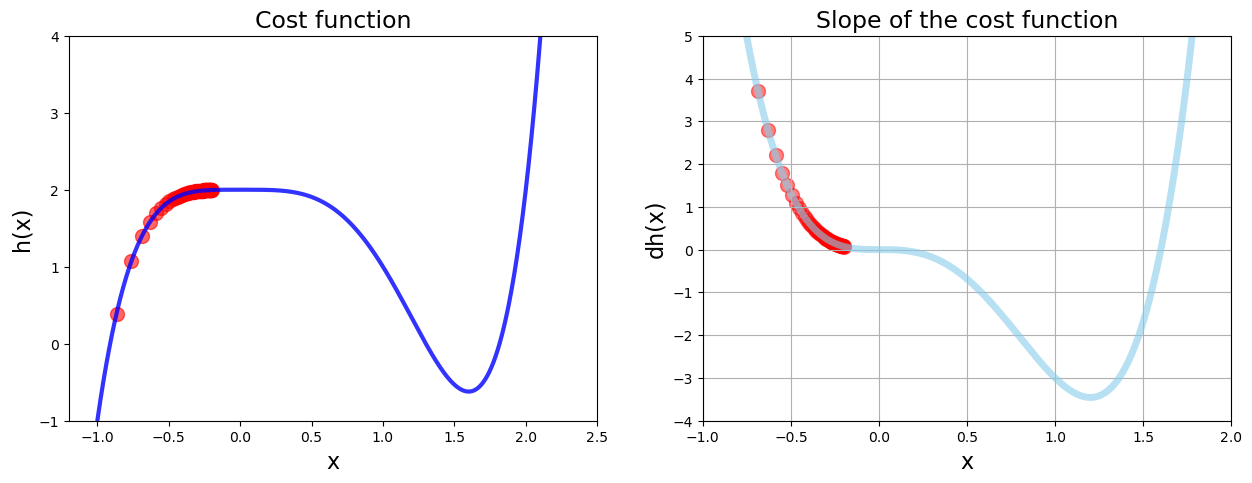

Local min: -1.8398461123332792e+24
Cost: -2.1081790694225687e+121
Number of steps: 72


In [18]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func = dh, initial_guess = -0.2, 
                                                 max_iter = 71)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5]) # measured in inches

# 1.Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.title('Cost function', fontsize = 17)
plt.xlabel('x', fontsize = 16)
plt.ylabel('h(x)', fontsize = 16)

plt.plot(x_3, h(x_3), color = 'blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, h(np.array(list_x)), color ='red', s=100, alpha=0.6) # function does not take list


# 2.Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-1,2)
plt.ylim(-4,5)

plt.grid()

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('x', fontsize = 16)
plt.ylabel('dh(x)', fontsize = 16)

plt.plot(x_3, dh(x_3), color = 'skyblue', linewidth = 5, alpha = 0.6)
plt.scatter(list_x, deriv_list, color = 'red', s = 100, alpha = 0.5)


plt.show()


print('Local min:', local_min)
print('Cost:', h(local_min))
print('Number of steps:', len(list_x))

# NOTE: when initial_guess = -0.2 --> OVERFLOW ERROR (goes to negative infinity, diverges)

In [19]:
import sys
# help(sys)

sys.float_info.max # max number that this computer can handle

1.7976931348623157e+308

## Python Tuples

In [20]:
# Creating a tuple - tuple packing
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

# How to access a value in a tuple
print('I love', breakfast[1])
print('My hotel has no '+ str(unlucky_numbers[1]) + 'th floor')

not_my_address = 1, 'Infinite Loop', 'Cupertino', 95014 
# NOTE: difference than lists, tuples can heterogeneous, also they are immutable (can't change)

tuple_with_single_value = 1, 

main, side, greens = breakfast # sequence unpacking

data_tuple = gradient_descent(derivative_func = dh, initial_guess=0.2)

I love eggs
My hotel has no 4th floor


In [21]:
data_tuple[0]

1.5989534547394717

# The Learning Rate

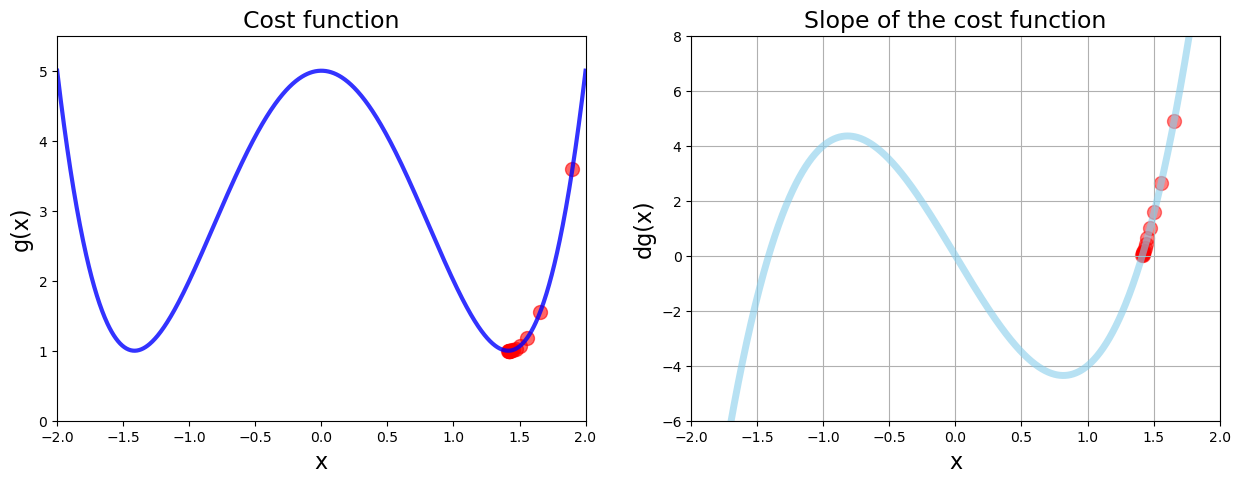

Number of steps: 14


In [22]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 1.9,
                                                multiplier = 0.02, max_iter = 500) 

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15,5]) # measured in inches

# 1.Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2,2)
plt.ylim(0,5.5)

plt.title('Cost function', fontsize = 17)
plt.xlabel('x', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)

plt.plot(x_2, g(x_2), color = 'blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), color ='red', s=100, alpha=0.6) # function does not take list


# 2.Chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.grid()

plt.title('Slope of the cost function', fontsize = 17)
plt.xlabel('x', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)

plt.plot(x_2, dg(x_2), color = 'skyblue', linewidth = 5, alpha = 0.6)
plt.scatter(list_x, deriv_list, color = 'red', s = 100, alpha = 0.5)


plt.show()

print("Number of steps:", len(list_x))

# NOTE: When learning rate is high, it does not converge (need to use while)


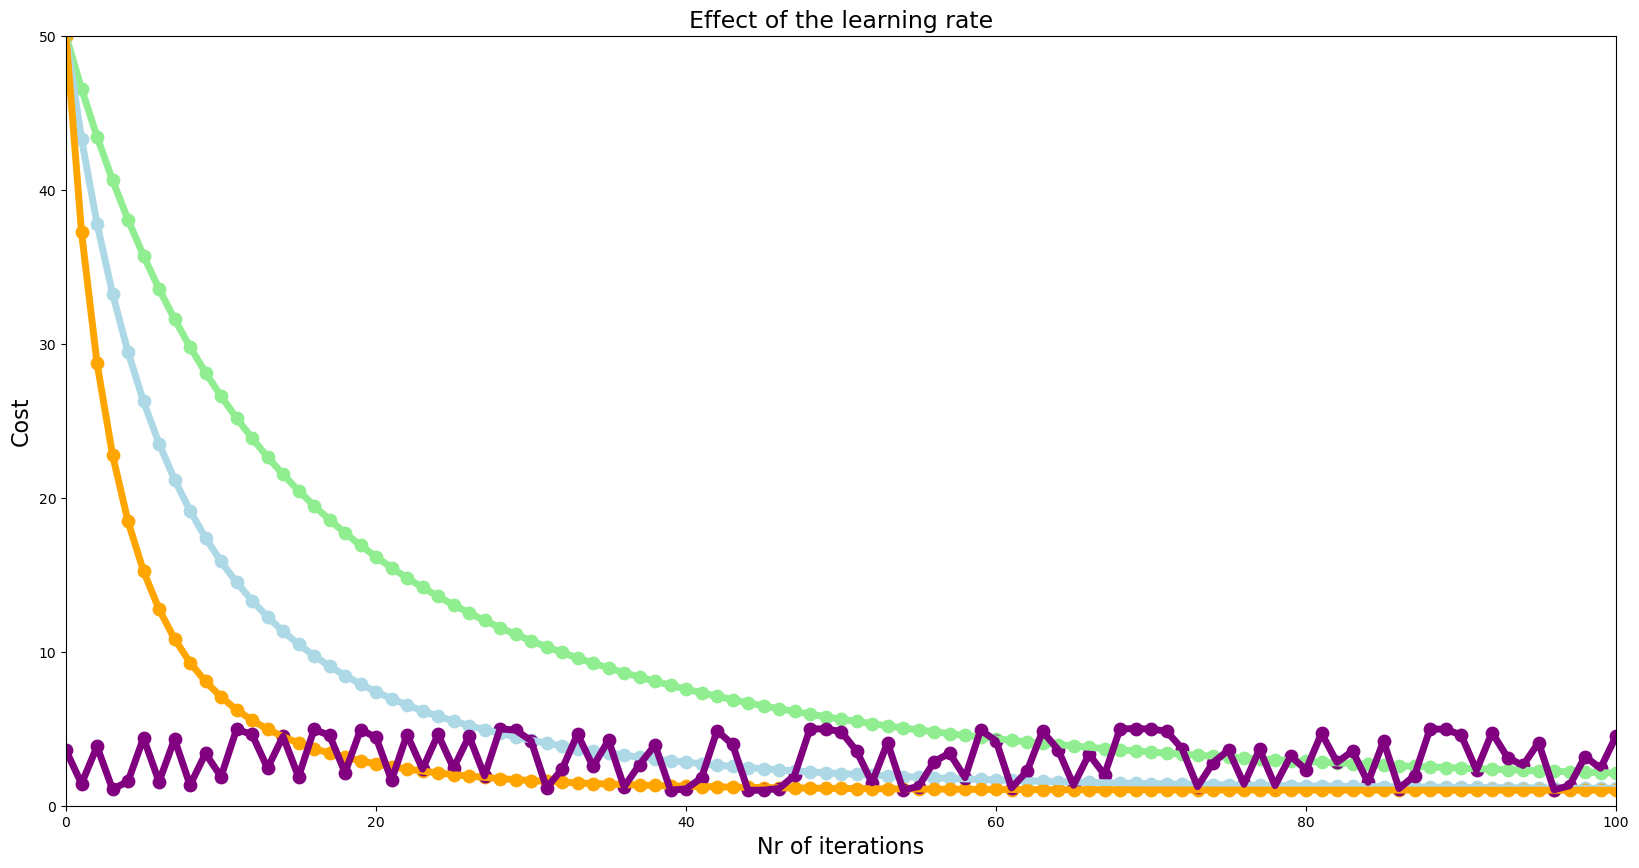

In [23]:
# Run gradient descent three times
n = 100
low_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, # store in tuple
                                                multiplier = 0.0005, precision=0.0001, max_iter = n) 

mid_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, # store in tuple
                                                multiplier = 0.001, precision=0.0001, max_iter = n)

high_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, # store in tuple
                                                multiplier = 0.002, precision=0.0001, max_iter = n) 

# Experiment
insane_gamma = gradient_descent(derivative_func = dg, initial_guess = 1.9, # store in tuple
                                                multiplier = 0.25, precision=0.0001, max_iter = n)

# Plotting reduction in cost for every iteration
plt.figure(figsize=[20,10]) # measured in inches

plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of the learning rate', fontsize = 17)
plt.xlabel('Nr of iterations', fontsize = 16)
plt.ylabel('Cost', fontsize = 16)

# Values for our charts
# 1) y-axis data: convert the lists to numpy array
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
insane_values = np.array(insane_gamma[1])

# 2) x-axis data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))# convert range object to list

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color = 'lightgreen', linewidth = 5)
plt.scatter(iteration_list, g(low_values), color ='lightgreen', s=80) # function does not take list

# Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color = 'lightblue', linewidth = 5)
plt.scatter(iteration_list, g(mid_values), color ='lightblue', s=80) # function does not take list

# Plotting high learning rate
plt.plot(iteration_list, g(high_values), color = 'orange', linewidth = 5)
plt.scatter(iteration_list, g(high_values), color ='orange', s=80) # function does not take list

# Plotting insane learning rate
plt.plot(iteration_list, g(insane_values), color = 'purple', linewidth = 5)
plt.scatter(iteration_list, g(insane_values), color ='purple', s=80) # function does not take list

plt.show()

# NOTE: Higher the multiplier, converges faster (but it is good until some point - overflow)

# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2} + 1}$$

In [24]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [31]:
# Generate data
x_4 = np.linspace(start = -2, stop = 2, num = 200)
y_4 = np.linspace(start = -2, stop = 2, num = 200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4) # return a matrix from vector (convert to 2d)

print('Array after meshgrid', x_4.shape)

Shape of X array (200,)
Array after meshgrid (200, 200)


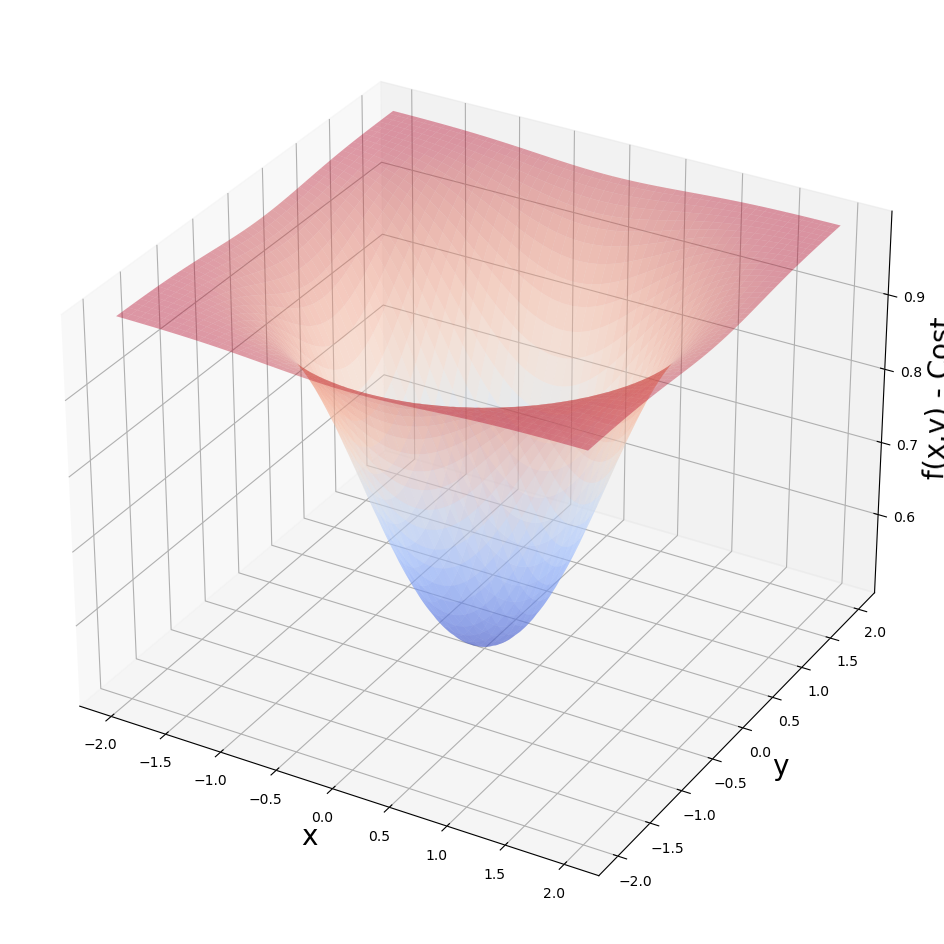

In [43]:
# Generating 3D Plot
fig = plt.figure(figsize = [16,12])
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel('x', fontsize = 20)
ax.set_ylabel('y', fontsize = 20)
ax.set_zlabel('f(x,y) - Cost', fontsize = 20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.coolwarm, alpha = 0.4)

plt.show()

## Partial Derivatives & Symbolic Computation

## $$ \frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right)^2}$$

## $$ \frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right)^2}$$

In [54]:
a, b = symbols('x, y')
print('Cost function f(x,y):', f(a, b))
print('Partial derivative wrt x:', diff(f(a,b), a))
print('Value of f(x,y) at x = 1.8 and y = 1.0 is', 
      f(a,b).evalf(subs = {a:1.8, b:1.0})) # python dictionary (key-value pairs)
print('Value of part. derivative wrt x:', diff(f(a,b), a).evalf(subs = {a:1.8, b:1.0}))

Cost function f(x,y): 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x = 1.8 and y = 1.0 is 0.990604794032582
Value of part. derivative wrt x: 0.0368089716197505


## Batch Gradient Descent with SymPy

In [64]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs = {a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs = {a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of', params[0])
print('Minimum occurs at y value of', params[1])
print('The cost:', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of 3.45838599885832e-11
Minimum occurs at y value of 1.92132555492129e-11
The cost: 0.500000000000000


In [61]:
# Partial derivative functions 
def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*r*x*log(3)/(r + 1)**2

def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*r*y*log(3)/(r + 1)**2

In [63]:
# Setup - This one is much faster than SymPy 
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of', params[0])
print('Minimum occurs at y value of', params[1])
print('The cost:', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of 3.458385998858304e-11
Minimum occurs at y value of 1.9213255549212797e-11
The cost: 0.5


## Graphing 3D Gradient Descent & Advanced Numpy Arrays

In [90]:
# Setup 
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1,2) # convert to 2d (x,y)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    # values_array = np.append(values_array, params.reshape(1,2), axis = 0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis = 0) # alternative to append
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of', params[0])
print('Minimum occurs at y value of', params[1])
print('The cost:', f(params[0], params[1]))

Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of 0.0007938985101347202
Minimum occurs at y value of 0.0004410547278526219
The cost: 0.5000002265349848


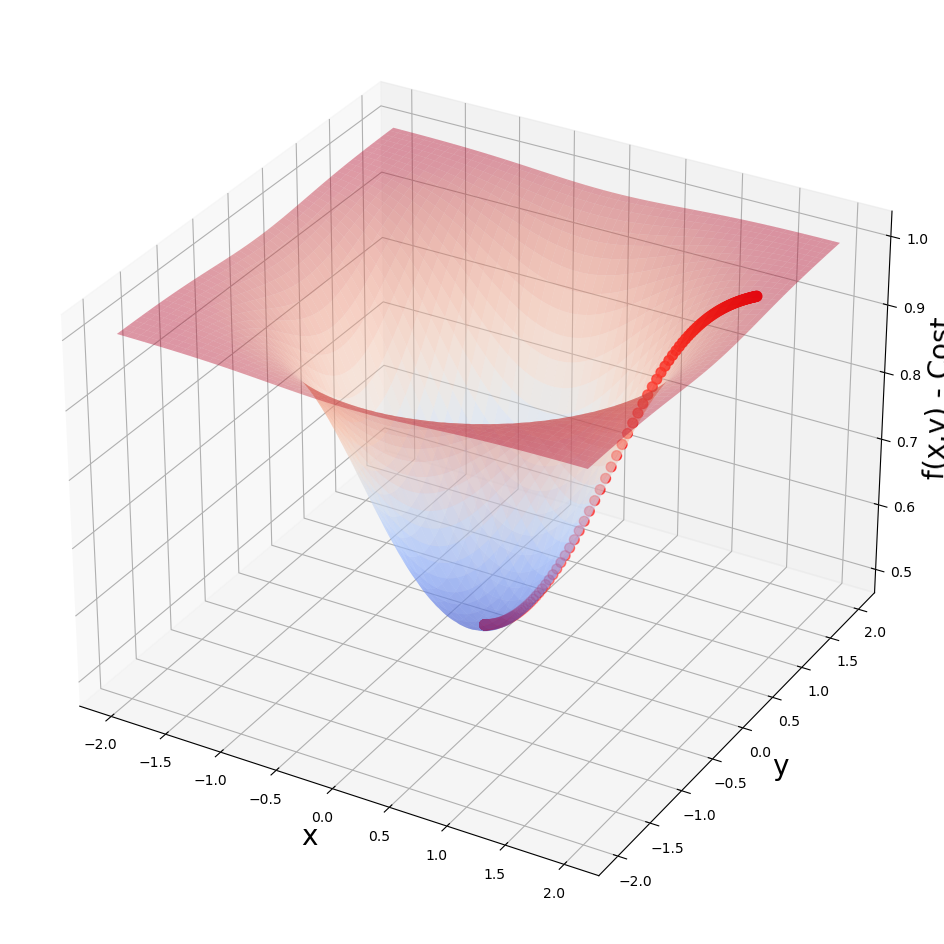

In [91]:
# Generating 3D Plot
fig = plt.figure(figsize = [16,12])
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel('x', fontsize = 20)
ax.set_ylabel('y', fontsize = 20)
ax.set_zlabel('f(x,y) - Cost', fontsize = 20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.coolwarm, alpha = 0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0],values_array[:, 1]),
          s=50, color = 'red')

plt.show()

In [79]:
# Advanced Numpy Array Practice

kirk = np.array([['Captain', 'Guitar']]) # create 2d array
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print(hs_band[0])
print(hs_band[1][0])

the_roots = np.append(arr = hs_band, values = kirk, axis = 0)
print(the_roots)

print("Printing nicknames...", the_roots[: , 0]) # : means take all the rows, and 0 refers to first column

the_roots = np.append(arr = the_roots, values = [['Malik B', 'MC']], axis = 0)

print("Printing band roles...", the_roots[:,1])

(1, 2)
(2, 2)
['Black Thought' 'MC']
Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles... ['MC' 'Drums' 'Guitar' 'MC']


# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$ RSS = \sum_{i=1}^{n} \big( y^{(i)}- h_\theta x^{(i)} \big)^2 $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)}- h_\theta x^{(i)} \big)^2 $$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [ ]:
# MSE helps keeping the cost function slow --> does not overflow

In [100]:
# Generate data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1) # alternative to transpose

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [103]:
# Quick Linear Regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


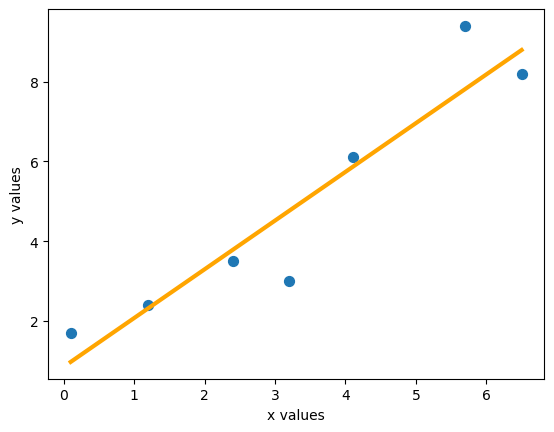

In [104]:
# Plot
plt.scatter(x_5, y_5, s= 50)
plt.plot(x_5, regr.predict(x_5), color = 'orange', linewidth = 3)

plt.xlabel('x values')
plt.ylabel('y values')

plt.show()

In [108]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029545 + 1.2227264637835913*x_5
print('Est values y_hat are: \n', y_hat)
print('Act values y are: \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Act values y are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [130]:
# Manual MSE calculation
def calculate_MSE(y, y_hat):
    RSS = 0
    n = len(y)
    
    for i in range(0, len(y)):
        RSS += (y[i][0] - y_hat[i][0])**2
    
    MSE = (1/n) * RSS
    
    return MSE

In [131]:
# Manual
calculate_MSE(y_5, y_hat)

0.9479655759794576

In [133]:
# Sklearn function
mean_squared_error(y_5, y_hat)

0.9479655759794577

## 3D Plot for the MSE Cost Function

### Generate data for thetas

In [154]:
nr_theta = 200
th_0 = np.linspace(start = -1, stop = 3, num =nr_theta)
th_1 = np.linspace(start = -1, stop = 3, num =nr_theta) 

plot_t0, plot_t1 = np.meshgrid(th_0, th_1) # convert to 2d array
plot_t0.shape

(200, 200)

### Calc MSE using nested for loops

In [155]:
plot_cost = np.zeros((nr_theta,nr_theta))

for i in range(nr_theta):
    for j in range(nr_theta):
        # print(plot_t0 [j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = calculate_MSE(y_5, y_hat)

print('Shape of plot_t0:', plot_t0.shape)
print('Shape of plot_t1:', plot_t1.shape)
print('Shape of plot_cost:', plot_cost.shape)

Shape of plot_t0: (200, 200)
Shape of plot_t1: (200, 200)
Shape of plot_cost: (200, 200)


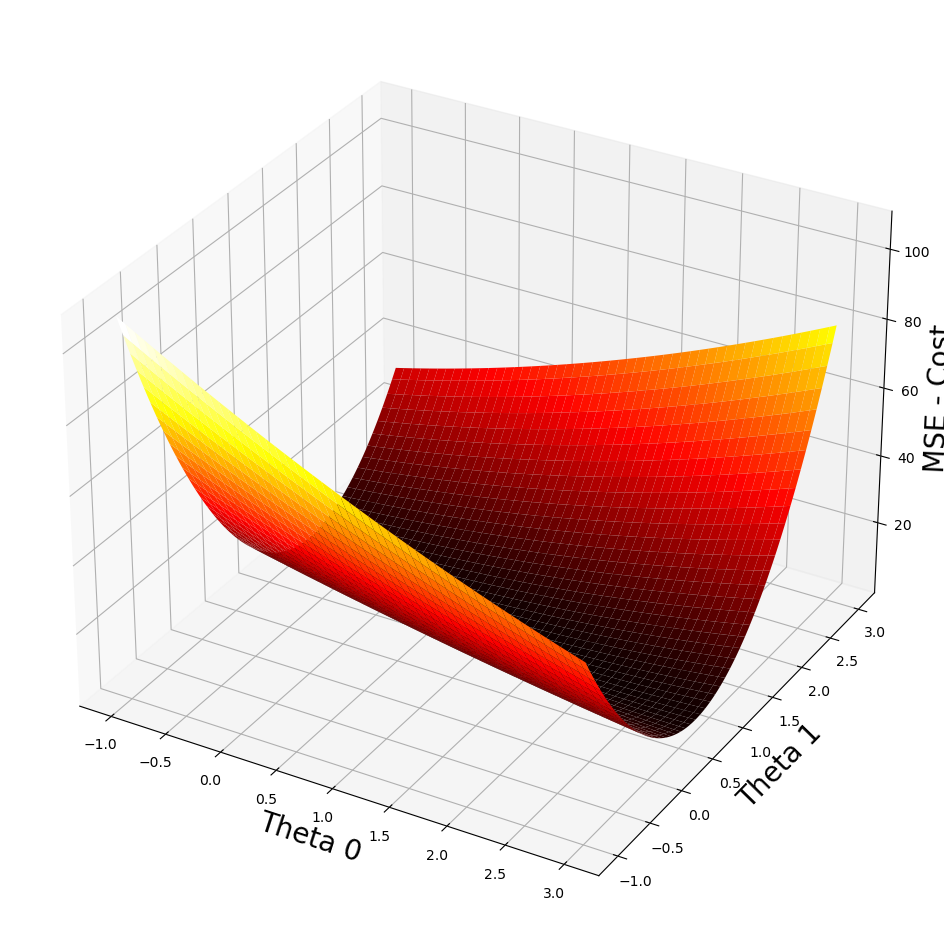

In [157]:
# Plotting MSE
fig = plt.figure(figsize = [16,12])
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel('Theta 0', fontsize = 20)
ax.set_ylabel('Theta 1', fontsize = 20)
ax.set_zlabel('MSE - Cost', fontsize = 20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.hot)
plt.show()

In [165]:
print('Min value of plot_cost:', plot_cost.min())
ij_min = np.unravel_index(indices = plot_cost.argmin(), shape = plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]:', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]:', plot_t1[111][91])

Min value of plot_cost: 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91]: 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91]: 1.2311557788944723


## Partial Derivatives of MSE wrt $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x ^{(i)} \big)$$

## MSE & Gradient Descent

In [178]:
def grad(x, y, thetas):
    n = y.size
    
    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [182]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = calculate_MSE(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr = mse_vals, values = calculate_MSE(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at theta 0:', thetas[0])
print('Min occurs at theta 1:', thetas[1])
print('MSE:', mean_squared_error(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at theta 0: 0.8532230461743415
Min occurs at theta 1: 1.2214935332607393
MSE: 0.9479751138321334


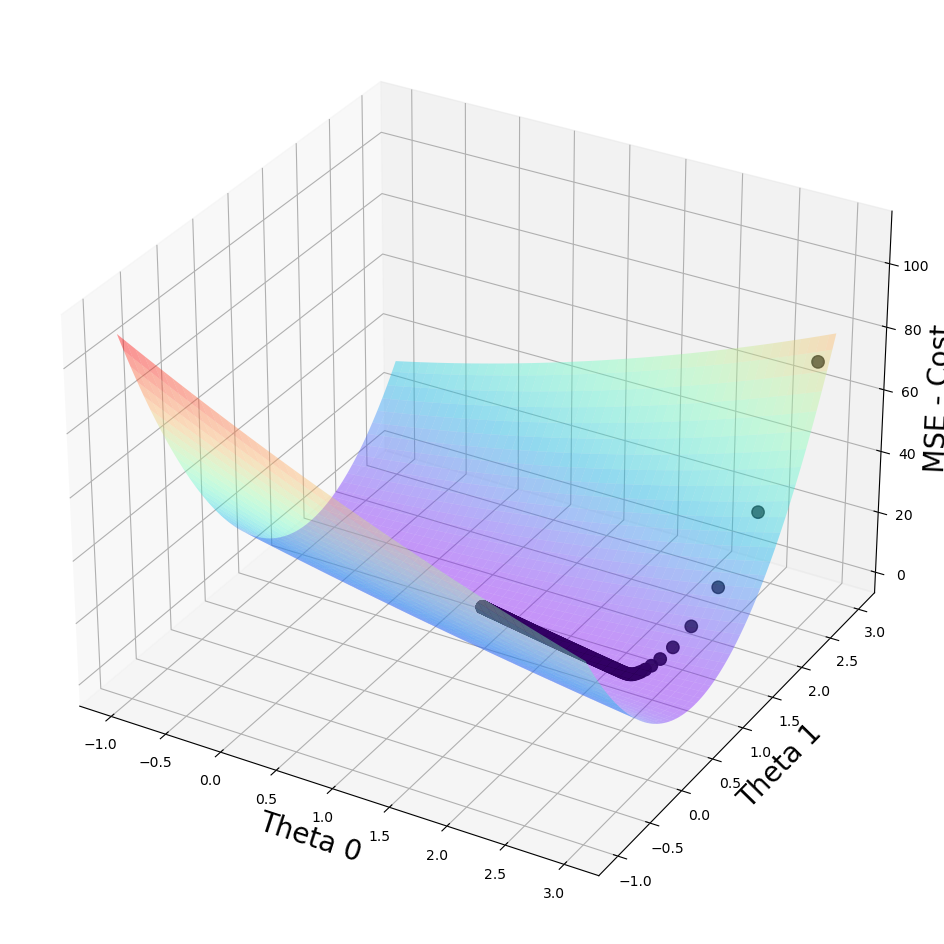

In [187]:
# Plotting MSE
fig = plt.figure(figsize = [16,12])
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel('Theta 0', fontsize = 20)
ax.set_ylabel('Theta 1', fontsize = 20)
ax.set_zlabel('MSE - Cost', fontsize = 20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.rainbow, alpha = 0.4)
plt.show()